In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
trainData=pd.read_csv("A2Q2Data_train.csv",header=None)
testData=pd.read_csv("A2Q2Data_test.csv",header=None)
X=trainData.iloc[:,:-1]
X_test=testData.iloc[:,:-1]
y=trainData.iloc[:,-1].to_frame()
y_test=testData.iloc[:,-1].to_frame()
X_test.head()
# data.head()
y.shape

(10000, 1)

# Analytic solution is : 

In [3]:
X=X.to_numpy()
y=y.to_numpy()
X_test=X_test.to_numpy()
X_test=X_test.transpose()
X=X.transpose()
y_test=y_test.to_numpy()
w_ml = np.linalg.inv(X @ X.transpose()) @ X @y

In [4]:
w_ml.shape

(100, 1)

In [5]:
def errorFunction(X,w,y):
    errorVector=X.transpose()@w - y
    error = errorVector.transpose() @ errorVector
    return error;

print(errorFunction(X,w_ml,y))

[[396.86441863]]


In [6]:
print(errorFunction(X_test,w_ml,y_test))

[[185.36365558]]


# Linear regression using gradient decent

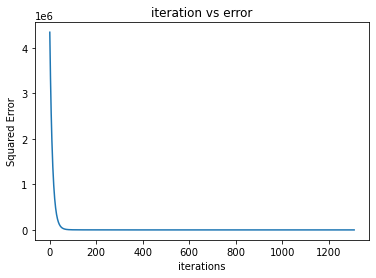

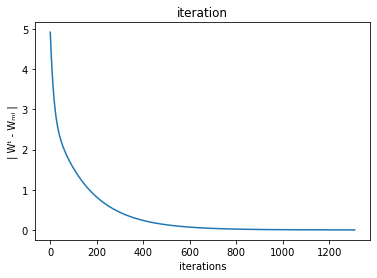

[[396.865273]]
[[185.31602672]]


In [8]:
def converge(w1,w2):
    if np.linalg.norm(w1-w2)**2 <= 0.0000001 :
        return True
    return False
def derivative(X,y,w):
    return 2*(((X @ X.transpose()) @ w) - (X@y))

def computeNewW(X,y,w,step):
    der=derivative(X,y,w)
#     newW = w - step*(der)/np.linalg.norm(der)
    newW=w - step*der
    return newW;

def plot(x,y,xlabel="X",ylabel="Y",title=""):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
def diffWithMl(w):
    diff= w_ml-w
#     return diff.transpose() @ diff
    return np.linalg.norm(diff)
    
# commented line conains various trial and errors of different methods
def gradientDecent(X,y,step):
    t=0
    iterations=[]
    errors=[]
    diffMl=[]
    np.random.seed(2)
    w=np.random.rand(100,1)
#     w=np.zeros([100,1])
    prevError = errorFunction(X,w,y);
    prevW=w
    while(True):
        w=computeNewW(X,y,w,step)
        currError=errorFunction(X,w,y);
        if(currError[0][0] == np.inf):
            break
        iterations.append(t)
        errors.append(prevError[0][0])
        diffMl.append(diffWithMl(w))
        if(abs(prevError - currError) <= 0.00001):
            break
#         if(converge(w,prevW)):
#             break
        prevW=w
        prevError=currError
        t+=1
#         step=(1/t)*0.0005

    plot(iterations,errors,"iterations","Squared Error","iteration vs error")
    plot(iterations,diffMl,"iterations","| Wᵗ - Wₘₗ |","iteration")
    return w


step=0.0000039
# step=1/60000
w=gradientDecent(X,y,step)    
print(errorFunction(X,w,y))
print(errorFunction(X_test,w,y_test))

# Stochastic gradient decent

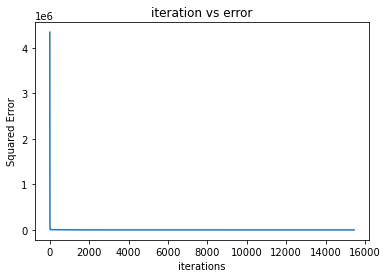

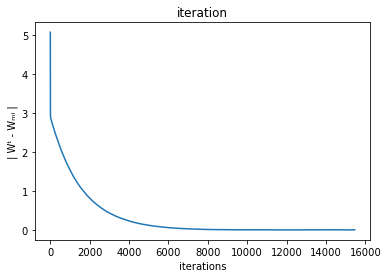

[[468.97357916]]
[[176.37419973]]


In [9]:
def converge(w1,w2):
    if np.linalg.norm(w1-w2)**2 <= 0.1 :
        return True
    return False
def stochasticGradientDecent(X,y,step,batchSize):
    t=0
    iterations=[]
    errors=[]
    diffMl=[]
    count=0
    np.random.seed(2)
    w=np.random.rand(100,1)
    s=w
    count+=1
    prevError = errorFunction(X,w,y);
    w_new=w
    prevW=w
    while(True):
        iterations.append(t)
        errors.append(prevError[0][0])
        diffMl.append(diffWithMl(w_new))
        
        indexes=np.random.randint(X.shape[1], size=batchSize)
#         print(indexes)
        X_batch=X[:,indexes]
        y_batch=y[indexes,:]
        
#         print(X_batch,y_batch)
        w_new=computeNewW(X_batch,y_batch,w_new,step)
        s=s+w_new
        count+=1
        currError=errorFunction(X,w_new,y);
        if(currError[0][0] == np.inf or abs(prevError - currError) <= 0.00001):
#             print("hello")
            break
#         if(converge(w_new,prevW)):
#             break
        prewW=w_new
        prevError=currError
        t+=1

    
    plot(iterations,errors,"iterations","Squared Error","iteration vs error")
    plot(iterations,diffMl,"iterations","| Wᵗ - Wₘₗ |","iteration")
    w_avg=s/count
    
    return w_avg;

batchSize=100
step=0.000039
# step=0.01
w=stochasticGradientDecent(X,y,step,batchSize)
print(errorFunction(X,w,y))
print(errorFunction(X_test,w,y_test))

    

# Ridge regression

In [ ]:
import random
random.seed(10)

def ridgeError(X,y,w):
    errorVector=X.transpose()@w - y
    error = (errorVector.transpose() @ errorVector)
    return error;

def derivative(X,y,w,lambdaValue):
    return 2*(((X @ X.transpose()) @ w) - (X@y) + lambdaValue*w)

def computeNewW(X,y,w,lambdaValue,step):
    newW = w - step*derivative(X,y,w,lambdaValue)
    return newW;

def plot(x,y,xlabel="X",ylabel="Y"):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def diffWithMl(w):
    diff= w_ml-w
    return diff.transpose() @ diff
    
    
def ridgeGradientDecent(X,y,step,lambdaValue):
    t=1
#     iterations=[]
#     errors=[]
#     diffMl=[]
    np.random.seed(2)
    w=np.random.rand(100,1)
#     w=np.zeros([100,1])
    prevError = ridgeError(X,y,w);
    while(True):
        w=computeNewW(X,y,w,lambdaValue,step)
        currError=ridgeError(X,y,w);
        if(currError[0][0] == np.inf):
            break
#         print(prevError)
#         iterations.append(t)
#         errors.append(prevError[0][0])
#         diffMl.append(diffWithMl(w)[0][0])
        if(abs(prevError - currError) <= 0.000001):
            break
        prevError=currError
        t+=1
#         step=(1/t)*0.0005
#     print(iterations,errors)
#     plot(iterations,errors,"iterations","Squared Error")
#     plot(iterations,diffMl,"iterations","Squared Error with $w_{ML}$")
    return w

def kFoldValidation(X,y,k,lambdaValue):
    indexes=[i for i in range(X.shape[1])]
    random.seed(2)
    random.shuffle(indexes)
    validateErrorSum=0;
    trainErrorSum=0;
    step=0.0000039
    count=0
#     lambdaMatrix=np.identity(X.shape[0]) * lambdaValue
    for i in range(0,X.shape[1],k):
        X_validate=X[:,indexes[i:i+k]]
        y_validate=y[indexes[i:i+k],:]
        X_train=X[:,indexes[0:i] + indexes[i+k:]]
        y_train=y[indexes[0:i] + indexes[i+k:],:]
#         X_train.shape
        w=ridgeGradientDecent(X_train,y_train,step,lambdaValue)
        trainErrorSum+=ridgeError(X_train,y_train,w,)
        validateErrorSum+=ridgeError(X_validate,y_validate,w)
        count+=1
    
    return trainErrorSum/count , validateErrorSum/count
        
        
minValidError=np.inf
lambdaValue=-1
k=1000 
lambdaList=[]
validateErrorList=[]
# eigenval,_=np.linalg.eig(X@X.transpose())
for i in np.arange(1,100,1):
# for i in eigenval:
    trainError,validateError=kFoldValidation(X,y,k,i)
    lambdaList.append(i)
    validateErrorList.append(validateError[0][0])
    print(i)
    if(minValidError > validateError):
        minValidError=validateError
        lambdaValue=i 

# lambdaValue=2500
step=0.0000039
print(lambdaValue)
plot(lambdaList,validateErrorList,xlabel="lambdas",ylabel="validation errors")
# lambdaMatrix=np.identity(X.shape[0]) * lambdaValue
# w=np.linalg.inv(X @ X.transpose() + lambdaMatrix) @ X @y
w=ridgeGradientDecent(X,y,step,lambdaValue)

print(ridgeError(X,y,w))
print(ridgeError(X_test,y_test,w))


In [ ]:
w=ridgeGradientDecent(X,y,step,lambdaValue)

print(ridgeError(X,y,w))
print(ridgeError(X_test,y_test,w))